# 1. Movement with constant acceleration

In [1]:
from __future__ import division, print_function, generators
import  numpy as np
import kalman as k

In [2]:
%matplotlib inline

In [3]:
# %load kalman.py

import numpy as np
import matplotlib.pyplot as plt



def kalman_predict( A, # transition matrix 
            r, # measurement error matrix
            H, # transformation matrix from state vector to measurement
            p, # initial variance on prediction
            xkal, # estimated state vector
            xpredict, # predicted state vector
            xmeas): # measurements
    for i in range(1, xkal.shape[1]): # for each measurement do 
        # prediction: recursive formula
        xpredict[:, i] = np.dot(A, xkal[:, i - 1])
        # predict covariance  
        p = A*p*A.T
        # construct kalman gain matrix according to prediction equations
        # higher gain leads to higher influence of measurement,
        # lower gain to higher influence of predicion
        K = np.dot(p*H.T, np.linalg.inv(H*p*H.T + r))
        # construct estimate from prediction and gain 
        xkal[:, i] = xpredict[:, i] + K*(xmeas[:, i] - H*xpredict[:, i])
        # update covariance with gain
        p = (np.identity(K.shape[0]) - K) * p
    return xkal, xpredict

def plot_results(xkal, xpredict, xmeas, xtrue):
    fig1 = plt.figure()
    ax1 = plt.axes()
    plt.plot(xtrue, 'b-', label = 'True')
    plt.plot(xmeas[0].T, 'rx', label = 'Measuement')
    plt.plot(xpredict[0].T, 'g.',  label = 'Prediction')
    plt.plot(xkal[0].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('X')

    fig2 = plt.figure()
    ax2 = plt.axes()
    plt.axhline(v)
    #plt.axhline(np.mean(xmeas[1]))
    plt.plot(xpredict[1].T, 'g.',  label = 'Prediction')
    plt.plot(xmeas[1].T, 'rx', label = 'Measurement')
    plt.plot(xkal[1].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('Velocity')
    return [[fig1, fig2], [ax1, ax2]]


## Check predictions
In the absence of noise, the prediction alone should reproduce the data well up to some integration error stemming from the finite timestep.

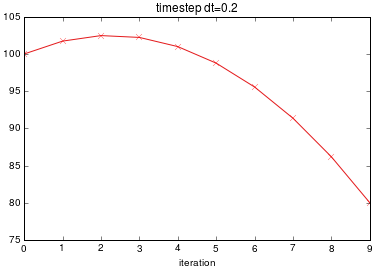

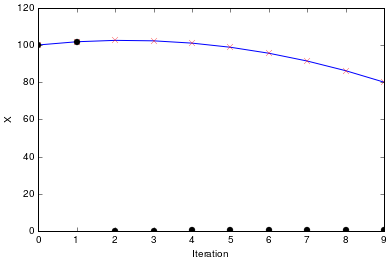

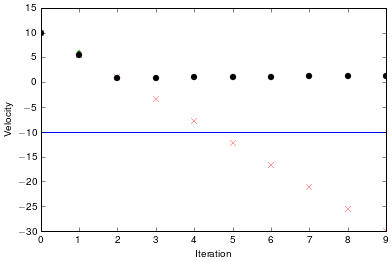

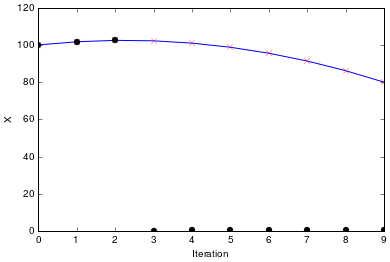

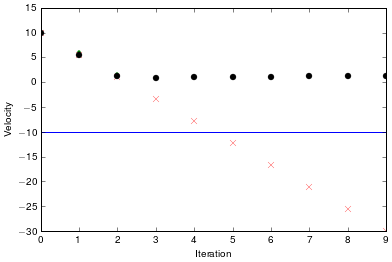

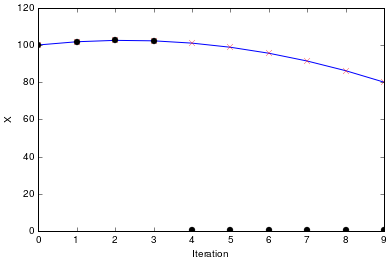

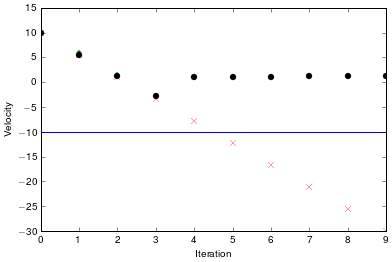

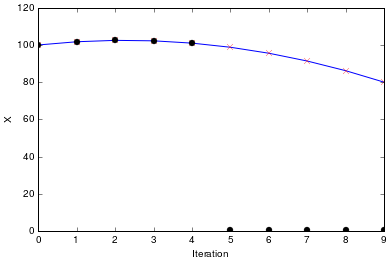

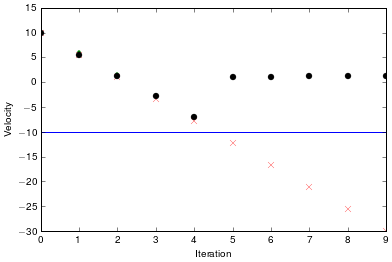

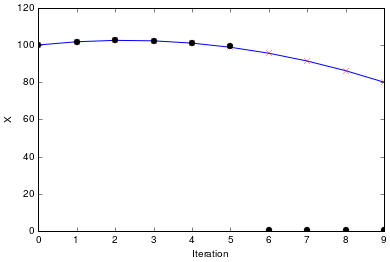

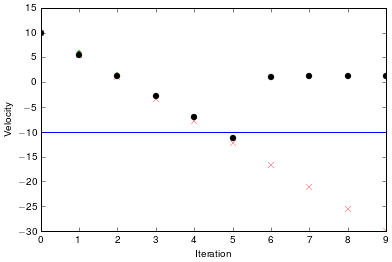

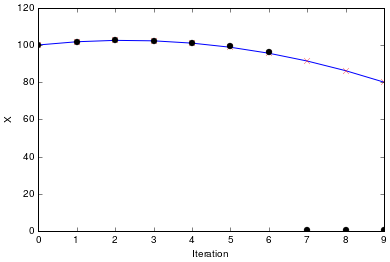

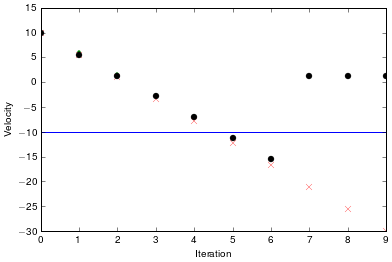

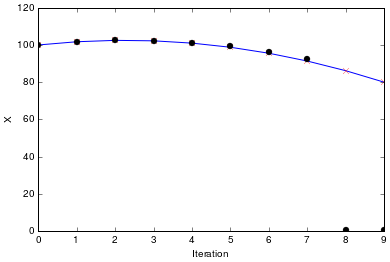

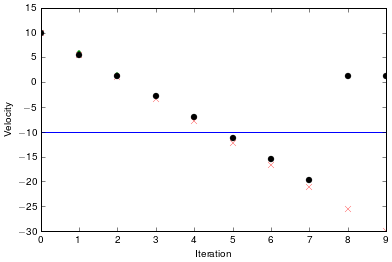

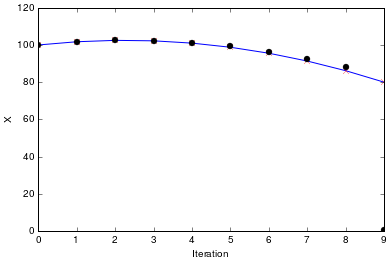

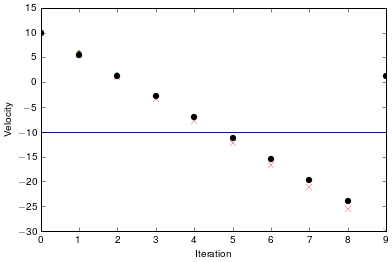

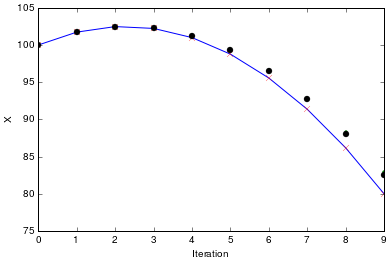

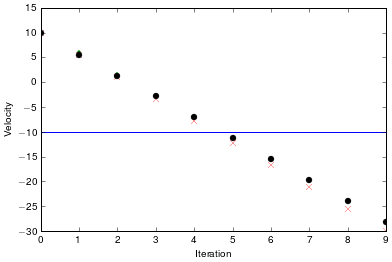

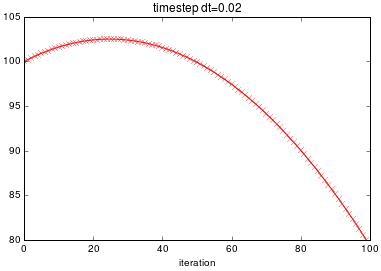

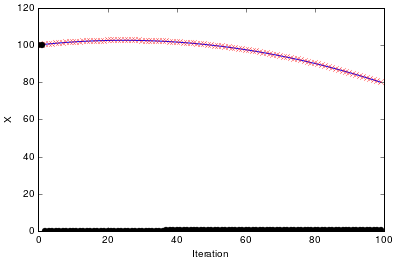

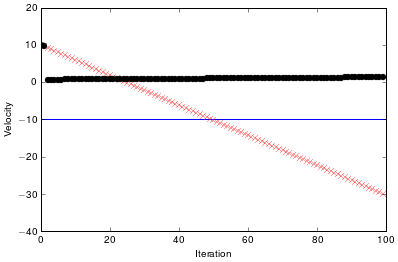

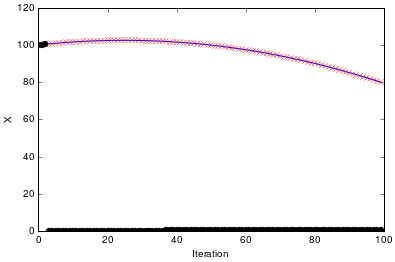

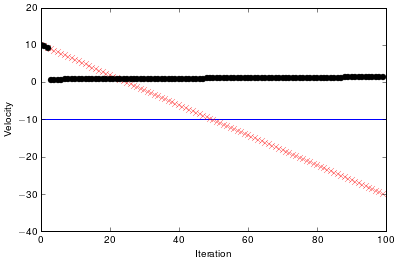

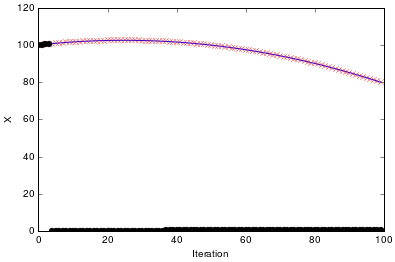

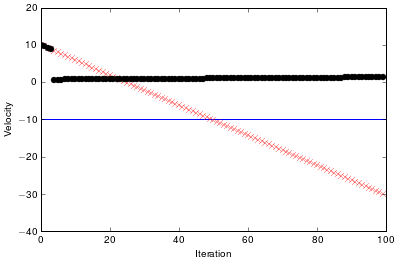

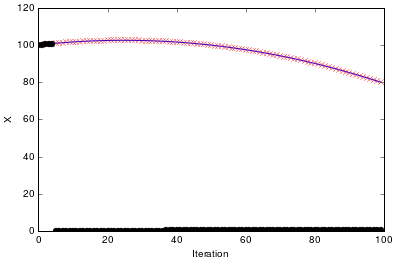

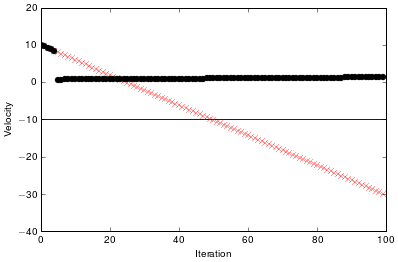

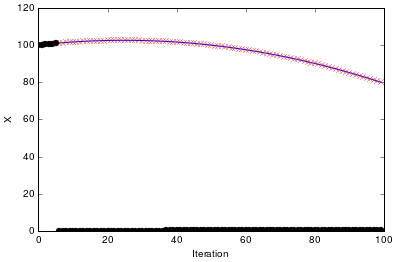

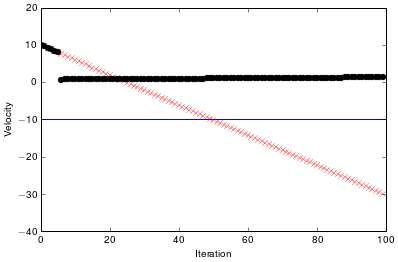

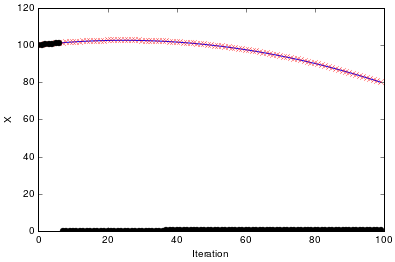

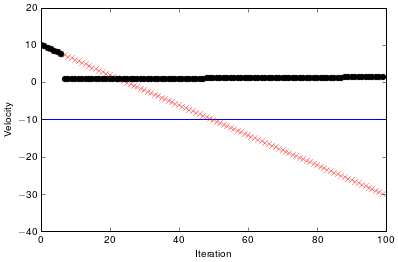

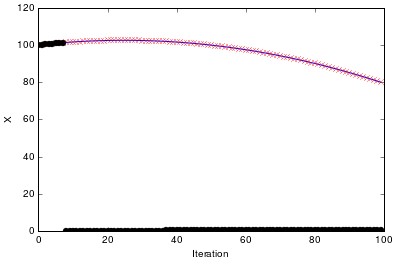

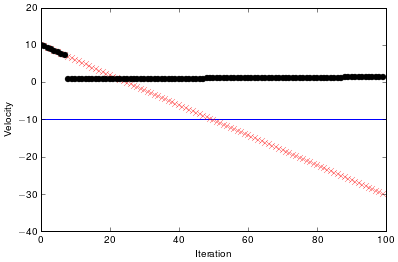

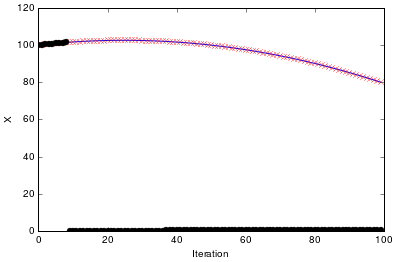

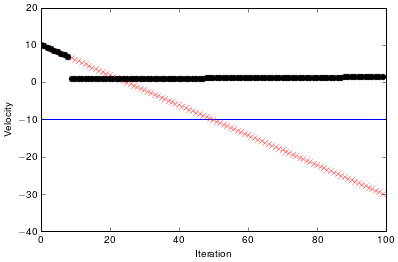

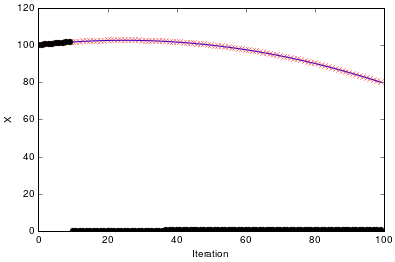

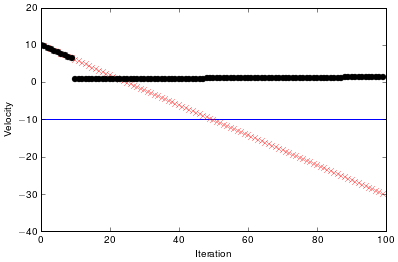

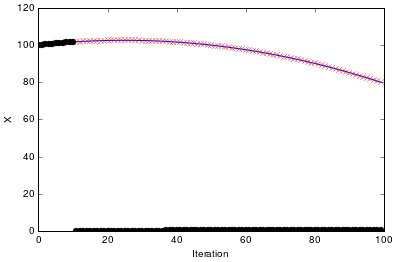

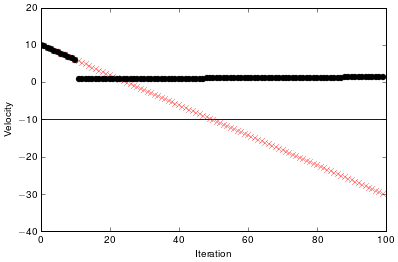

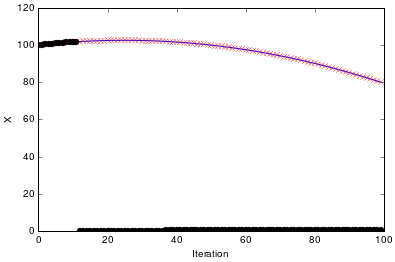

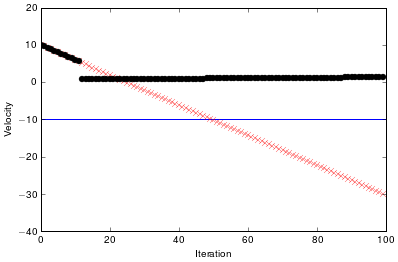

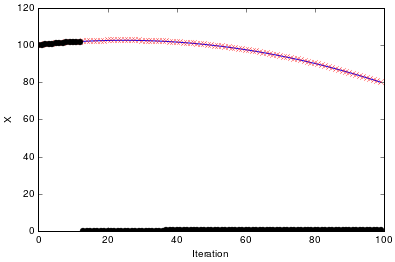

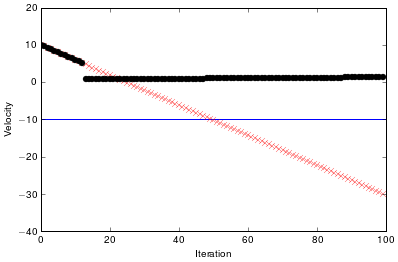

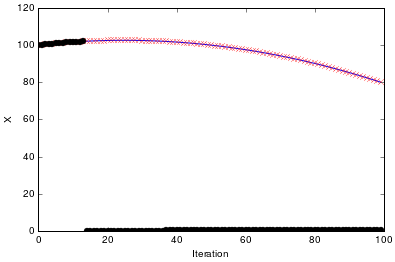

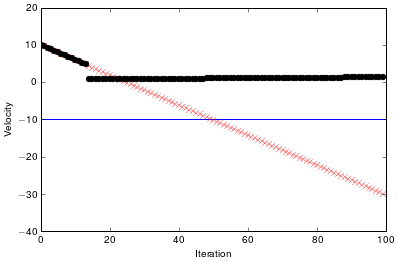

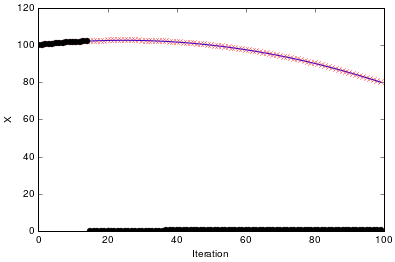

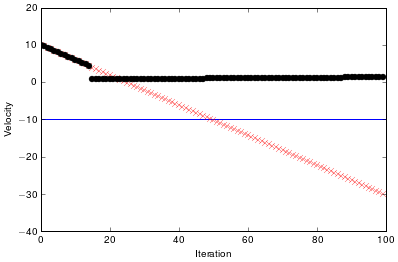

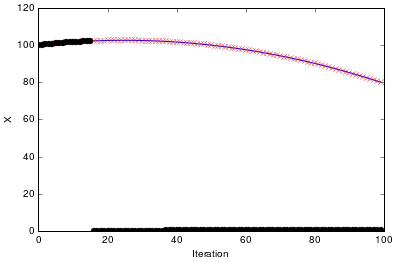

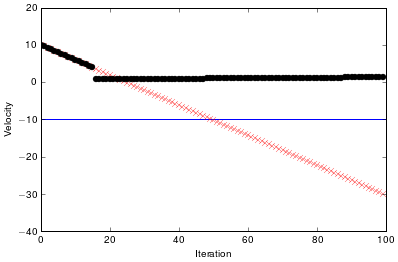

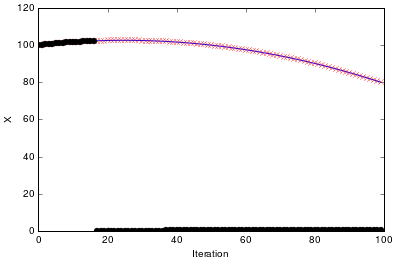

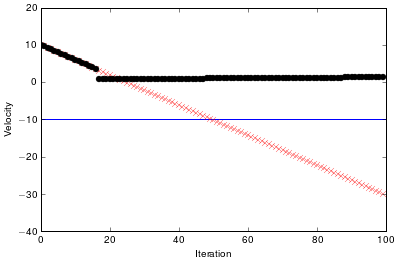

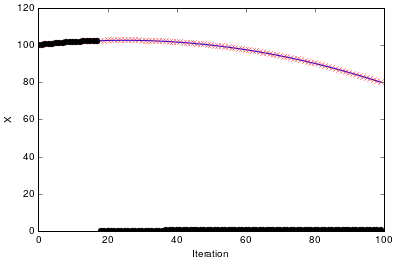

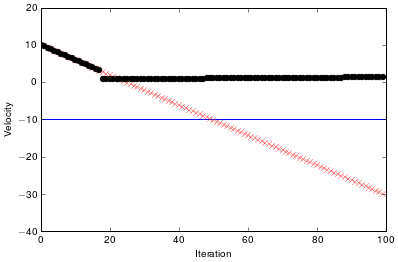

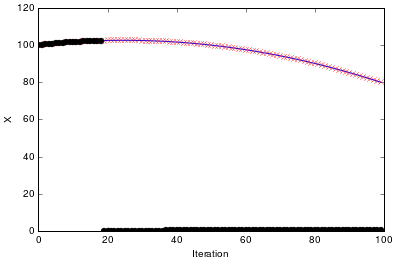

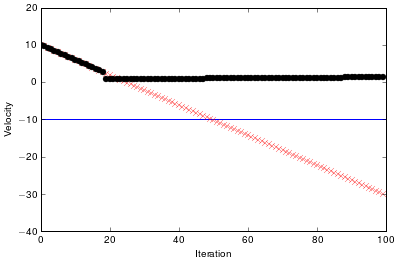

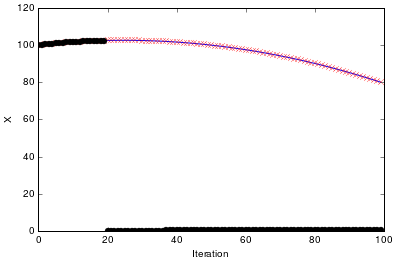

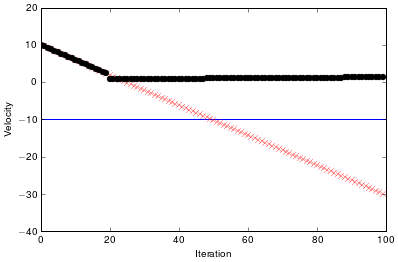

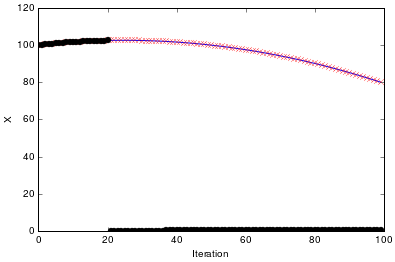

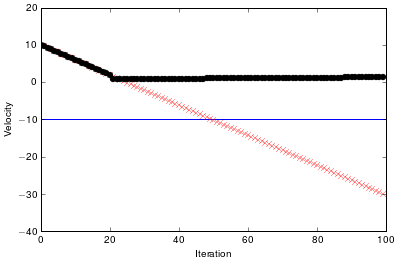

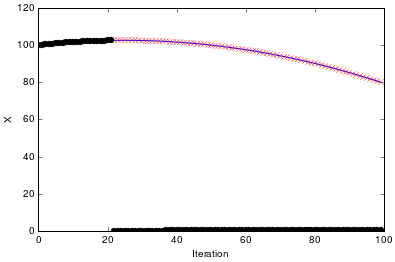

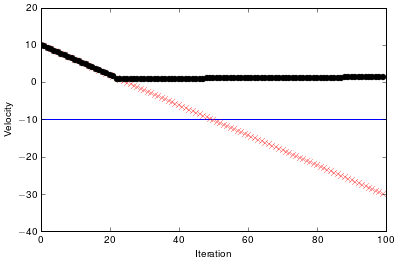

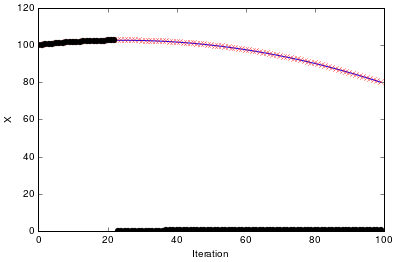

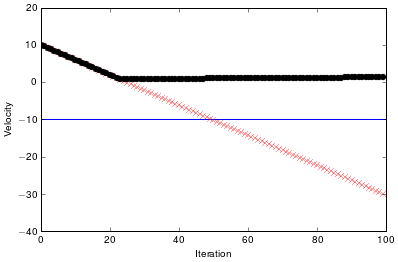

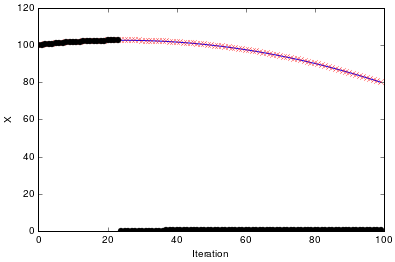

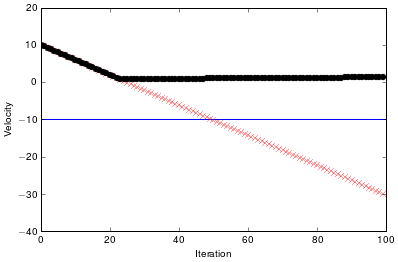

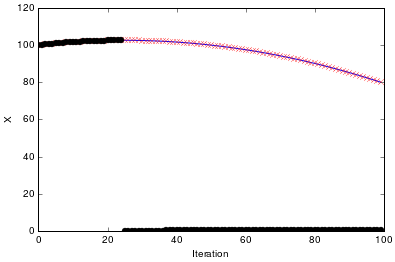

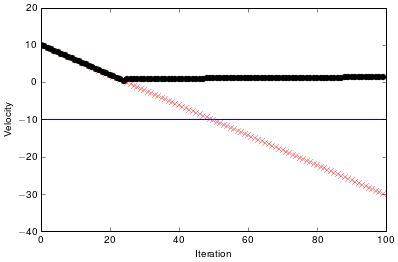

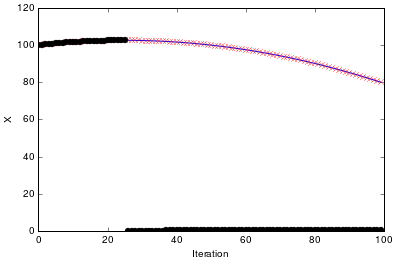

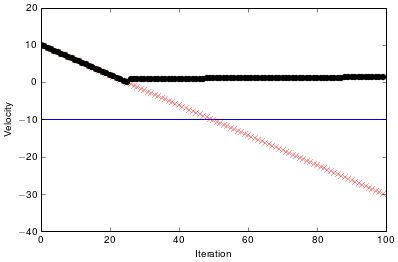

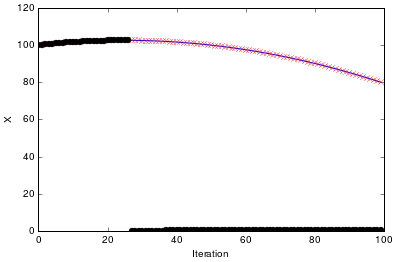

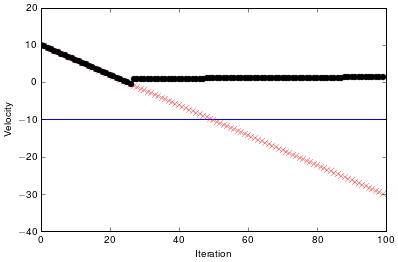

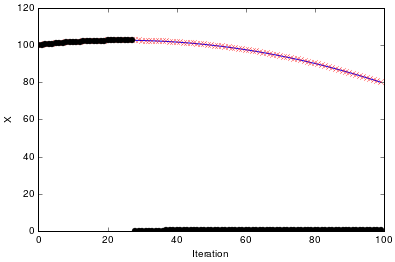

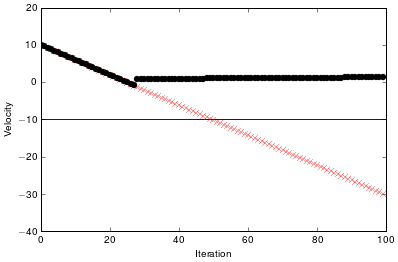

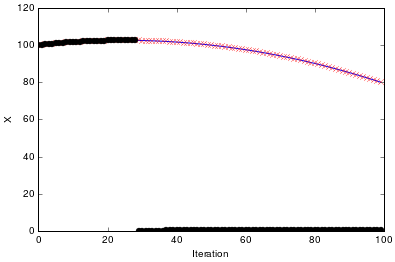

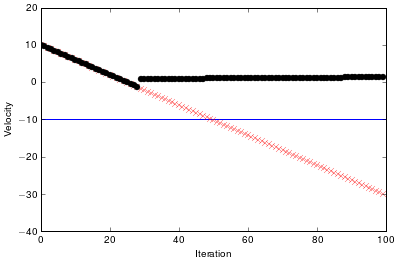

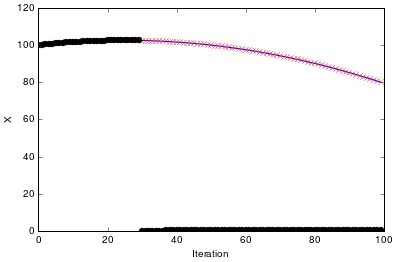

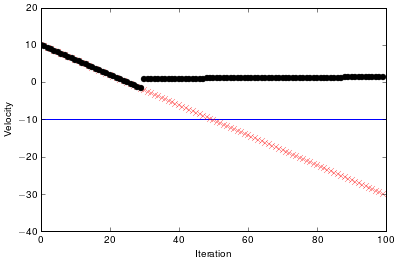

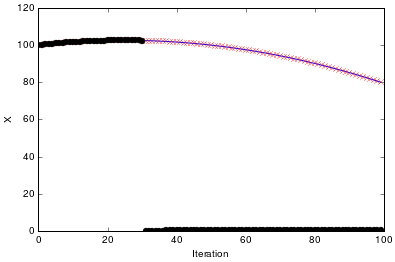

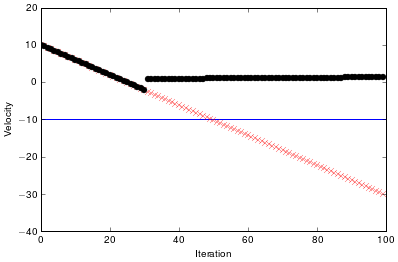

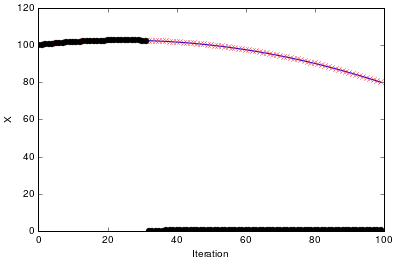

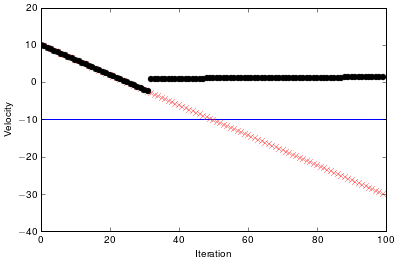

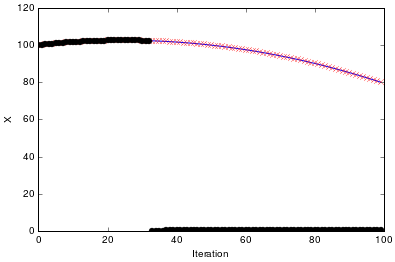

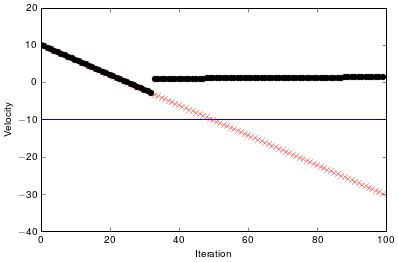

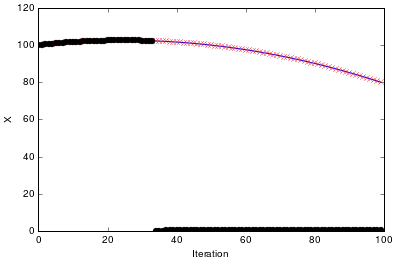

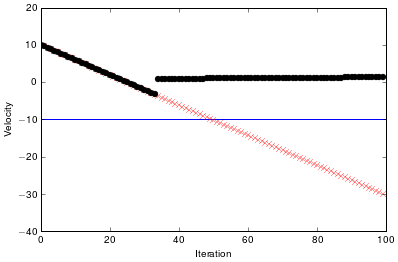

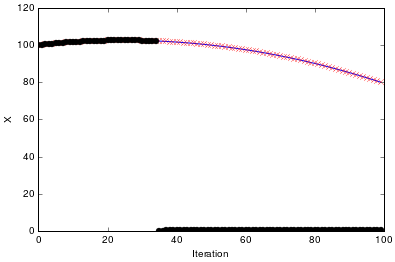

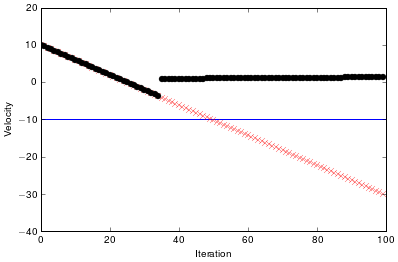

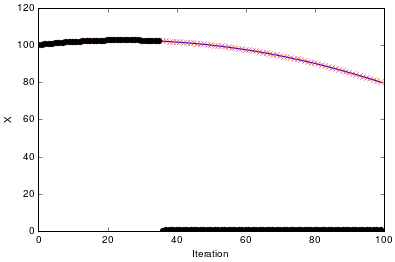

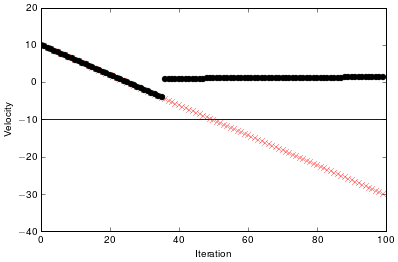

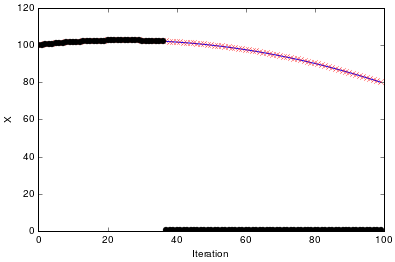

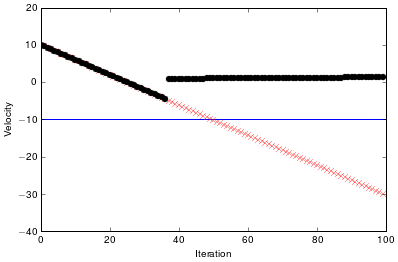

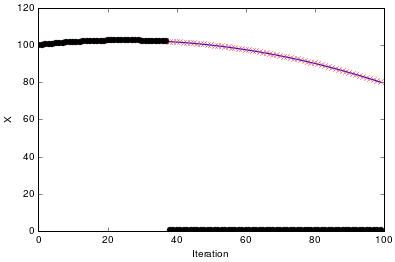

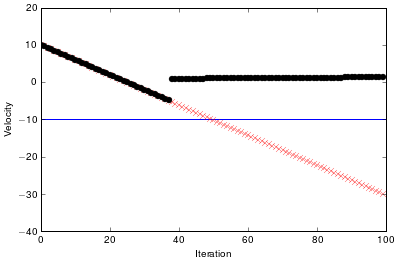

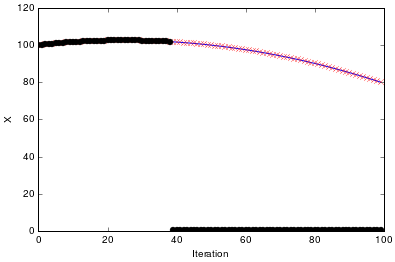

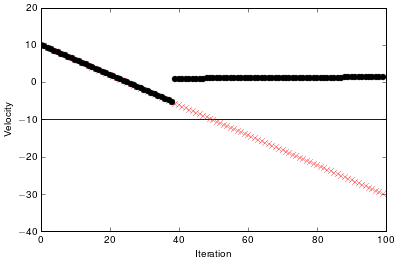

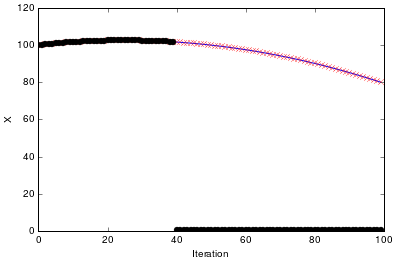

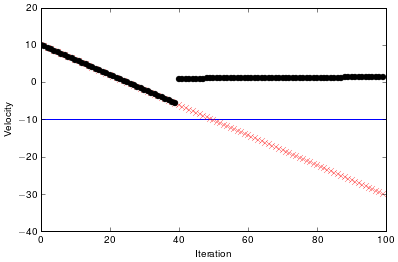

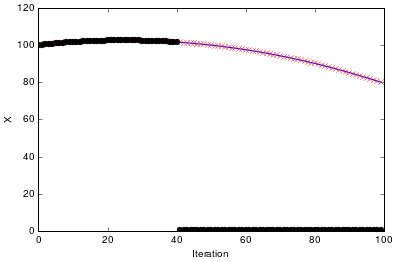

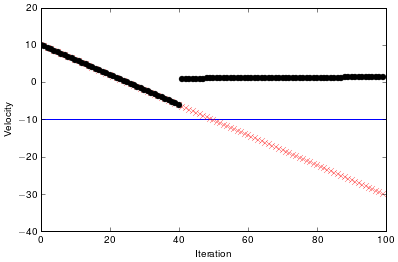

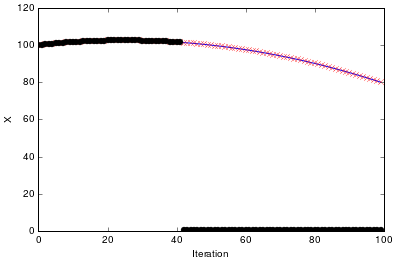

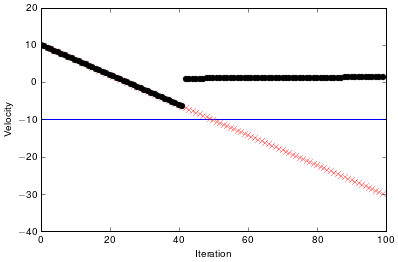

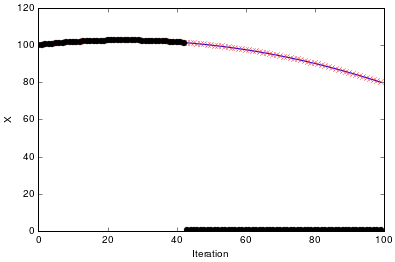

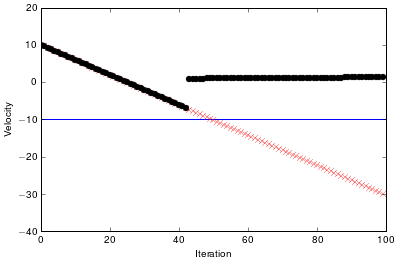

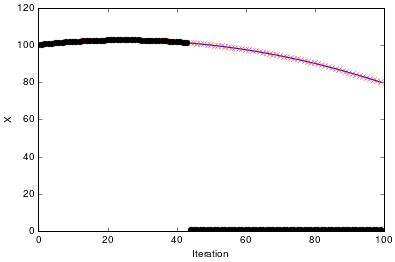

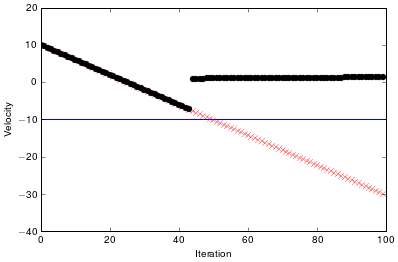

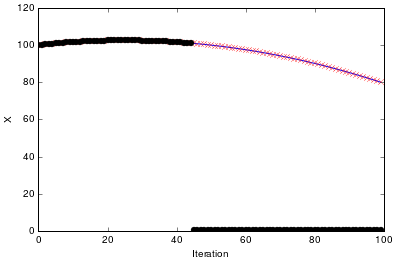

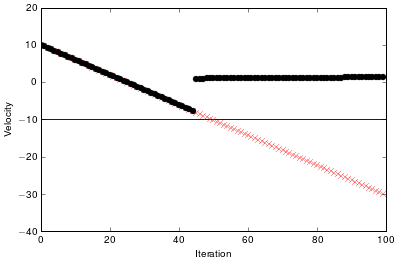

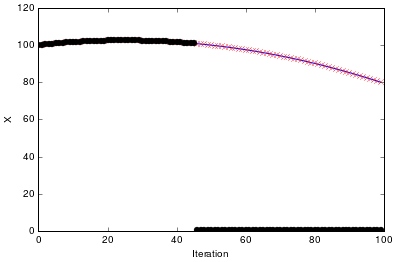

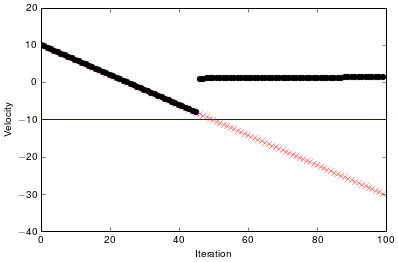

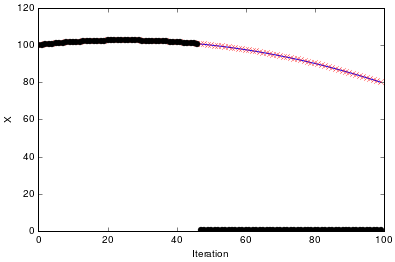

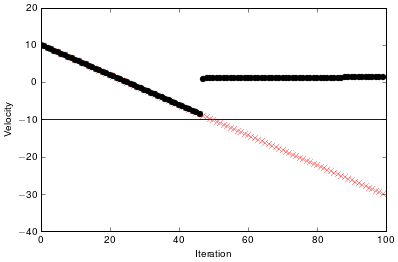

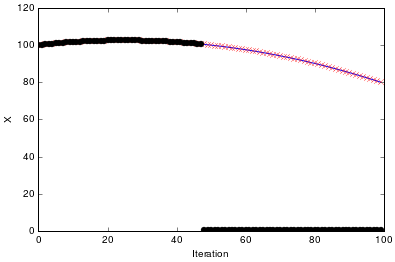

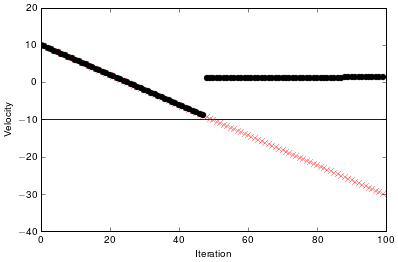

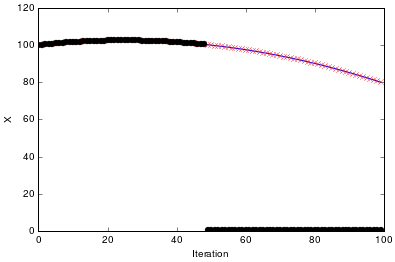

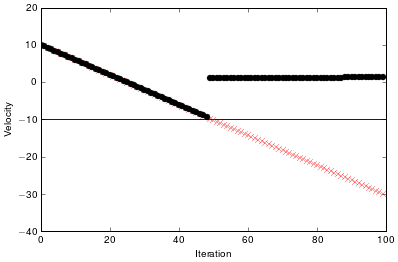

In [ ]:

for dt in [0.2, 0.02]:
    # final time for track
    T = 2
    # number of measurements
    N = int(T / dt)
    # initial position
    x0 = 100
    # position, velocity and acceleration
    state_vec_dim = 3
    # parabola with some curvature g 
    g = -20
    # initial velocity / slope
    v= 10
    # errors
    sigma = 0.0001
    sigma3 = 0.0001
    sigma4 = 0.0001

    xtrue4 = 0.5 * g  * np.linspace(0,T, N)**2 + v * np.linspace(0,T, N) + x0
    # add noise
    xmeas4 = np.matrix(np.linspace(0, T, N*state_vec_dim).reshape((state_vec_dim, N)))

    for i in range(0, N):
        xmeas4[0,i] = np.random.normal(xtrue4[i], sigma4)
        xmeas4[2,i] = np.random.normal(g, sigma)
    xmeas4[1] = np.random.normal(v + g * np.linspace(0,T, N), sigma)
    plt.figure()
    plt.title('timestep dt=%.4g' % (dt))
    plt.plot(xtrue4)
    plt.plot(xmeas4[0].T, 'rx')
    plt.xlabel('iteration')
    xpredict4 = np.matrix (np.linspace(0,2,N*state_vec_dim).reshape((state_vec_dim, N)))
    xkal4 = np.matrix (np.linspace(0,2,N*state_vec_dim).reshape((state_vec_dim, N)))
    # initial position
    xpredict4[:,0] = xkal4[:,0] = np.array ( [[xmeas4[0,0]], [xmeas4[1,0]], [xmeas4[2,0]] ] )
    # initial variance on prediction
    p4 = np.matrix ( [[2, 0, 0],
                        [0, 2, 0],
                        [0,0,2]] )
    # measurement error
    r4 = np.matrix([[sigma4*0.1, 0, 0],
                     [0  , 0.001*sigma3*sigma3,0],
                    [0,0, sigma4*0.001]])

    # prediction matrix
    A4 = np.matrix ( [[1, dt, 0.5 * dt**2], # the second order term can be omitted
                      # at the cost of worse predictions
                    [0, 1, dt],
                    [0, 0, 1]] )
    # transformation matrix (from measurement to state vector)
    H4 = np.matrix ( [[1 , 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]] )

    for i in range(1,N):
        # prediction: recursive formula
        xpredict4[:,i] = np.dot(A4, xkal4[:,i-1] )
        #p4 = A4*p4*A4.T
        K4 = p4*H4.T * np.linalg.inv(H4*p4*H4.T+r4)
        xkal4[:,i] = xpredict4[:,i] + K4*(xmeas4[:,i] - H4*xpredict4[:,i])
        p4 = (np.identity(state_vec_dim)-K4) * p4
        figs = k.plot_results(xkal4, xpredict4, xmeas4, xtrue4)
        plt.show()

[[ 101.59989937    5.99998861  -19.99992747]]
[[ 102.43939501    1.55560301  -19.99982673]]
[[ 102.32090543   -2.66665912  -19.99997399]]
[[ 101.31020561   -6.88886315  -19.99999892]]
[[ 99.40732159 -11.11108663 -20.00000358]]
[[ 96.61230987 -15.33329363 -19.99997407]]
[[ 92.92503818 -19.55551589 -19.99998423]]
[[ 88.34560977 -23.77772767 -19.99998469]]
[[ 82.87402082 -27.99992642 -19.99998287]]


In [7]:
figs = k.plot_results?
plt.show()

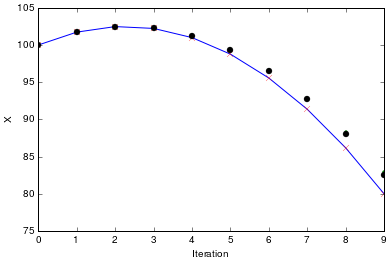

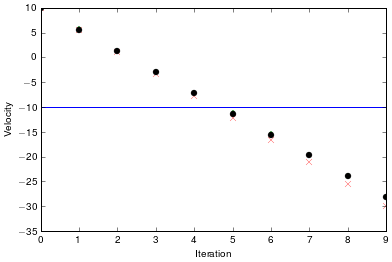

In [41]:
reload(k)

<module 'kalman' from 'kalman.pyc'>